In [1]:
##!pip install seaborn
##!pip install pandas
##!pip install numpy

In [2]:
import pandas as pd
import numpy as np
df_distras = pd.read_csv('./Reto/datadistras.csv',encoding = 'unicode_escape'
                         ,dayfirst=True
                         ,parse_dates=['FECHA_VENCIMIENTO','FECHA_DOCUMENTO'])

c:\users\joinner\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (6,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_distras.dropna(axis="columns", how="all")

,NOMBRE_DOCUMENTO_MAESTRO,NOMBRE_CONSECUTIVO,TIPO_DOCUMENTO,NUMERO_DOCUMENTO,FECHA_DOCUMENTO,FECHA_VENCIMIENTO,IDENTIFICACION_TERCERO,NOMBRE_TERCERO,ID_CENTRO_COSTO,NOMBRE_CENTRO_COSTO,...,TIPO,MARCA,LINEA,GRUPO,CLASE,NOMBRE_ESTABLECIMIENTO,ID_USUARIO_CREA,USUARIO_CREA,ID_TERCERO,ID_VENDEDOR
0,FACTURA,FACTURA ELECTRONICA DEV,DEV,3077,2020-01-02,2020-02-01,900247351,ECHEVERRI INVERSIONES CAMEL SOCIEDAD POR ACCIO...,8003,SV VENTAS,...,NaN,017-GERFOR,NaN,1023-SOLDADURA PVC CEMENTO SOLVENTE,NaN,NaN,25785971,LEDA YIMARA ARGUMEDO DIAZ,4509,1856
1,FACTURA,FACTURA ELECTRONICA DEV,DEV,3077,2020-01-02,2020-02-01,900247351,ECHEVERRI INVERSIONES CAMEL SOCIEDAD POR ACCIO...,8003,SV VENTAS,...,NaN,017-GERFOR,NaN,1007-ACCESORIOS PRESION LISO-ROSCADO,NaN,NaN,25785971,LEDA YIMARA ARGUMEDO DIAZ,4509,1856
2,FACTURA,FACTURA ELECTRONICA DEV,DEV,3077,2020-01-02,2020-02-01,900247351,ECHEVERRI INVERSIONES CAMEL SOCIEDAD POR ACCIO...,8003,SV VENTAS,...,NaN,017-GERFOR,NaN,1036-TUBERIA PRESION EXTREMO LISO,NaN,NaN,25785971,LEDA YIMARA ARGUMEDO DIAZ,4509,1856
3,FACTURA,FACTURA ELECTRONICA DEV,DEV,3079,2020-01-02,2020-01-04,890226,GOMEZ MORA HELIODORO JOSE,8003,SV VENTAS,...,NaN,017-GERFOR,NaN,1009-ACCESORIOS SANITARIO - VENTILACION,NaN,NaN,25785971,LEDA YIMARA ARGUMEDO DIAZ,19606,1856
4,FACTURA,FACTURA ELECTRONICA DEV,DEV,3079,2020-01-02,2020-01-04,890226,GOMEZ MORA HELIODORO JOSE,8003,SV VENTAS,...,NaN,017-GERFOR,NaN,1009-ACCESORIOS SANITARIO - VENTILACION,NaN,NaN,25785971,LEDA YIMARA ARGUMEDO DIAZ,19606,1856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222267,FACTURA,FACTURA ELECTRONICA DEV,DEV,63439,2021-10-09,2021-10-11,30688792,SANDRA MILENA SUAREZ MAFIOLI,8003,SV VENTAS,...,NaN,030-MARCA GENERICA,L076-LINEA GENERICA,3403-CANALETAS CABALLETES Y METALDECK,C001-ACESCO,NaN,25785971,LEDA YIMARA ARGUMEDO DIAZ,36529,1856
222268,FACTURA,FACTURA ELECTRONICA DEV,DEV,63439,2021-10-09,2021-10-11,30688792,SANDRA MILENA SUAREZ MAFIOLI,8003,SV VENTAS,...,NaN,030-MARCA GENERICA,L076-LINEA GENERICA,3408-PERFIL 120 X 60,C001-ACESCO,NaN,25785971,LEDA YIMARA ARGUMEDO DIAZ,36529,1856
222269,FACTURA,FACTURA ELECTRONICA DEV,DEV,63439,2021-10-09,2021-10-11,30688792,SANDRA MILENA SUAREZ MAFIOLI,8003,SV VENTAS,...,NaN,030-MARCA GENERICA,L076-LINEA GENERICA,1607-ANGULOS,C025-DIACO,NaN,25785971,LEDA YIMARA ARGUMEDO DIAZ,36529,1856
222270,FACTURA,FACTURA ELECTRONICA DEV,DEV,63443,2021-10-09,2021-10-10,77031265,NAVARRO CUELLO JOSEJOAQUIN,8003,SV VENTAS,...,T024-GENERICO,007-CERAMICA ITALIA,L076-LINEA GENERICA,7803-CERAMICA 30 X 60,C015-CERAMICA ITALIA,NaN,1067934023,ADRIANA LISETH GARCIA CARBONO,29739,1856


In [4]:
df_distras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222272 entries, 0 to 222271
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   NOMBRE_DOCUMENTO_MAESTRO  222272 non-null  object        
 1   NOMBRE_CONSECUTIVO        222272 non-null  object        
 2   TIPO_DOCUMENTO            222272 non-null  object        
 3   NUMERO_DOCUMENTO          222272 non-null  int64         
 4   FECHA_DOCUMENTO           222272 non-null  datetime64[ns]
 5   FECHA_VENCIMIENTO         222272 non-null  datetime64[ns]
 6   IDENTIFICACION_TERCERO    222272 non-null  object        
 7   NOMBRE_TERCERO            222272 non-null  object        
 8   ID_CENTRO_COSTO           222272 non-null  int64         
 9   NOMBRE_CENTRO_COSTO       222272 non-null  object        
 10  NOMBRE_CLASIFICACION      222272 non-null  object        
 11  ID_PRODUCTO_SERVICIO      222272 non-null  int64         
 12  PR

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
def plot_pie_chart(category, df):
    labels = df[category].astype('category').cat.categories.tolist()
    counts = df[category].value_counts()
    sizes = [counts[var_cat] for var_cat in labels]
    fig1, ax1 = plt.subplots(figsize=(10,10))
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
    plt.show()

In [7]:
def plot_frecuency_distribution(category, df):
    cat_count = df[category].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(cat_count.index, cat_count.values, alpha=0.9)
    plt.title(f'Frequency Distribution of {category.capitalize()}')
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(category.capitalize(), fontsize=12)
    plt.show()

In [8]:
df_distras['CANTIDAD'] = df_distras['CANTIDAD'].str.replace(',','')

In [9]:
df_distras['CANTIDAD'] = df_distras['CANTIDAD'].astype('float')

In [10]:
df_distras.drop(labels=["NOMBRE_DOCUMENTO_MAESTRO","NOMBRE_CONSECUTIVO"
                        ,"TIPO_DOCUMENTO","NUMERO_DOCUMENTO"], axis="columns",inplace=True)

In [11]:
df_distras.drop(labels=["IDENTIFICACION_TERCERO","NOMBRE_TERCERO","ID_CENTRO_COSTO"
                        ,"NOMBRE_CENTRO_COSTO","NOMBRE_CLASIFICACION"], axis="columns",inplace=True)

In [12]:
df_distras.drop(labels=["CEDULA_VENDEDOR","NOMBRE_VENDEDOR","FORMA_DE_PAGO"], axis="columns",inplace=True)

In [13]:
df_distras.drop(labels=["USUARIO_CREA","ID_TERCERO"], axis="columns",inplace=True)

In [14]:
df_distras['FECHA_DOCUMENTO'] = pd.to_datetime(df_distras['FECHA_DOCUMENTO'])

In [15]:
df_distras['FECHA_VENCIMIENTO'] = pd.to_datetime(df_distras['FECHA_VENCIMIENTO'])

In [16]:
df_distras['PRODUCTO_SERVICIO'] = df_distras['PRODUCTO_SERVICIO'].astype('category')

In [17]:
df_distras['VALOR_UNITARIO'] = df_distras['VALOR_UNITARIO'].str.replace(',','')
df_distras['VALOR_TOTAL'] = df_distras['VALOR_TOTAL'].str.replace(',','')
df_distras['VALOR_DESCUENTO'] = df_distras['VALOR_DESCUENTO'].str.replace(',','')
df_distras['SUBTOTAL'] = df_distras['SUBTOTAL'].str.replace(',','')
df_distras['IVA'] = df_distras['IVA'].str.replace(',','')
df_distras['TOTAL_NETO'] = df_distras['TOTAL_NETO'].str.replace(',','')
df_distras['UTILIDAD'] = df_distras['UTILIDAD'].str.replace(',','')
df_distras['RENTABILIDAD'] = df_distras['RENTABILIDAD'].str.replace(',','')
df_distras['COSTO'] = df_distras['COSTO'].str.replace(',','')

In [18]:
df_distras['CANTIDAD'] = df_distras['CANTIDAD'].astype('float')
df_distras['VALOR_UNITARIO'] = df_distras['VALOR_UNITARIO'].astype('float')
df_distras['VALOR_TOTAL'] = df_distras['VALOR_TOTAL'].astype('float')
df_distras['PORCENTAJE_DESCUENTO'] = df_distras['PORCENTAJE_DESCUENTO'].astype('float')
df_distras['VALOR_DESCUENTO'] = df_distras['VALOR_DESCUENTO'].astype('float')
df_distras['SUBTOTAL'] = df_distras['SUBTOTAL'].astype('float')
df_distras['IVA'] = df_distras['IVA'].astype('float')
df_distras['TOTAL_NETO'] = df_distras['TOTAL_NETO'].astype('float')
df_distras['UTILIDAD'] = df_distras['UTILIDAD'].astype('float')
df_distras['RENTABILIDAD'] = df_distras['RENTABILIDAD'].astype('float')
df_distras['COSTO'] = df_distras['COSTO'].astype('float')

In [19]:
df_distras['RENTABILIDAD'] = df_distras['RENTABILIDAD'].fillna(0.0)
df_distras["YEAR"] = df_distras["FECHA_DOCUMENTO"].dt.year

In [20]:
df_distras.sort_values(by='FECHA_DOCUMENTO',ascending = 'True')

,FECHA_DOCUMENTO,FECHA_VENCIMIENTO,ID_PRODUCTO_SERVICIO,PRODUCTO_SERVICIO,CANTIDAD,VALOR_UNITARIO,VALOR_TOTAL,PORCENTAJE_DESCUENTO,VALOR_DESCUENTO,SUBTOTAL,...,COSTO,TIPO,MARCA,LINEA,GRUPO,CLASE,NOMBRE_ESTABLECIMIENTO,ID_USUARIO_CREA,ID_VENDEDOR,YEAR
0,2020-01-02,2020-02-01,383,SOLDADURA LIQ PVC 1/32,1.0,14321.0,14321.0,40.00,5728.40,8592.60,...,5413.0,NaN,017-GERFOR,NaN,1023-SOLDADURA PVC CEMENTO SOLVENTE,NaN,NaN,25785971,1856,2020
353,2020-01-02,2020-01-03,744,VARILLA NTC 2289 5/8 x 60 LEG x 6 MTS,30.0,26308.0,789240.0,15.00,118386.00,670854.00,...,593070.0,NaN,030-MARCA GENERICA,L076-LINEA GENERICA,1601-VARILLAS CORRUGADAS X 6 MTS,C025-DIACO,NaN,1003718245,1856,2020
352,2020-01-02,2020-01-03,3301,BOQUILLA TRIO LATEX PORC BLANCO X 2 KL,1.0,3870.0,3870.0,0.00,0.00,3870.00,...,2550.0,NaN,030-MARCA GENERICA,L076-LINEA GENERICA,4802-MORTERO MEGA DE LA COSTA,C059-MEGA ANDINA SA,NaN,1063299696,1856,2020
351,2020-01-02,2020-01-03,139,TEE PRES 1/2,1.0,657.0,657.0,35.01,230.02,426.98,...,255.0,NaN,017-GERFOR,NaN,1007-ACCESORIOS PRESION LISO-ROSCADO,NaN,NaN,1063299696,1856,2020
350,2020-01-02,2020-01-03,5075,BOLSAS DE EMPAQUE,1.0,10.0,10.0,0.00,0.00,10.00,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1063299696,1856,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221969,2021-10-09,2021-10-11,948,CABALLETE TIPO G P.7 15,8.0,24320.0,194560.0,0.00,0.00,194560.00,...,180648.0,NaN,030-MARCA GENERICA,L076-LINEA GENERICA,3004-CABALLETES TIPO G PERFIL 7,C031-ETERNIT,NaN,1067910378,1044,2021
221968,2021-10-09,2021-11-08,234,TAPON PRES SOLD 2,1.0,5798.0,5798.0,0.00,0.00,5798.00,...,1865.0,NaN,017-GERFOR,NaN,1007-ACCESORIOS PRESION LISO-ROSCADO,NaN,NaN,1063299696,8843,2021
221967,2021-10-09,2021-11-08,229,TAPON PRES SOLD 1/2,3.0,231.0,693.0,33.04,228.97,464.03,...,453.0,NaN,017-GERFOR,NaN,1007-ACCESORIOS PRESION LISO-ROSCADO,NaN,NaN,1063299696,8843,2021
221978,2021-10-09,2021-11-08,347,ADAPTADOR TERM. CONDUIT 3/4,40.0,580.0,23200.0,12.00,2784.00,20416.00,...,16800.0,NaN,017-GERFOR,NaN,1004-ACCESORIOS CONDUIT ELECTRICO,NaN,NaN,1063299696,475,2021


In [21]:
df_distras['FECHA_DOCUMENTO'].max()

Timestamp('2021-10-09 00:00:00')

In [22]:
df_distras["MONTH"] = df_distras["FECHA_DOCUMENTO"].dt.month

In [23]:
df_distrias_grouped = df_distras.groupby(["YEAR","MONTH"]).agg(
    {'CANTIDAD':'sum','TOTAL_NETO':'sum'
     ,'ID_PRODUCTO_SERVICIO':'nunique'
     ,'ID_PRODUCTO_SERVICIO':'count'
     ,'PRODUCTO_SERVICIO':'nunique'
     ,'VALOR_UNITARIO':'mean'
     ,'VALOR_TOTAL':'sum'
     ,'PORCENTAJE_DESCUENTO':'mean'
     ,'VALOR_DESCUENTO':'sum'
     ,'SUBTOTAL':'sum'
     ,'IVA':'sum'
     ,'UTILIDAD':'sum'
     ,'RENTABILIDAD':'mean'
     ,'COSTO':'sum'})

In [24]:
df_distrias_grouped.reset_index(inplace=True) 

In [25]:
df_distrias_grouped['TOTAL_ACUMULADO'] = df_distrias_grouped['VALOR_TOTAL'].cumsum()

<h1>Procedo a escalar los datos</h1>

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import os
scaler = StandardScaler()
standard_df = scaler.fit_transform(df_distrias_grouped)
standard_df = pd.DataFrame(standard_df,columns = list(df_distrias_grouped.columns))

In [49]:
standard_df.info()
df_distrias_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   YEAR                  22 non-null     float64
 1   MONTH                 22 non-null     float64
 2   CANTIDAD              22 non-null     float64
 3   TOTAL_NETO            22 non-null     float64
 4   ID_PRODUCTO_SERVICIO  22 non-null     float64
 5   PRODUCTO_SERVICIO     22 non-null     float64
 6   VALOR_UNITARIO        22 non-null     float64
 7   VALOR_TOTAL           22 non-null     float64
 8   PORCENTAJE_DESCUENTO  22 non-null     float64
 9   VALOR_DESCUENTO       22 non-null     float64
 10  SUBTOTAL              22 non-null     float64
 11  IVA                   22 non-null     float64
 12  UTILIDAD              22 non-null     float64
 13  RENTABILIDAD          22 non-null     float64
 14  COSTO                 22 non-null     float64
 15  TOTAL_ACUMULADO       22 

In [119]:
Y = standard_df['CANTIDAD']
X = df_distrias_grouped#['VALOR_TOTAL']
#X = pd.factorize(standard_df['COSTO'])[0].reshape(-1, 1) 
X = X.drop(['CANTIDAD'], axis = 1)
#X.info()

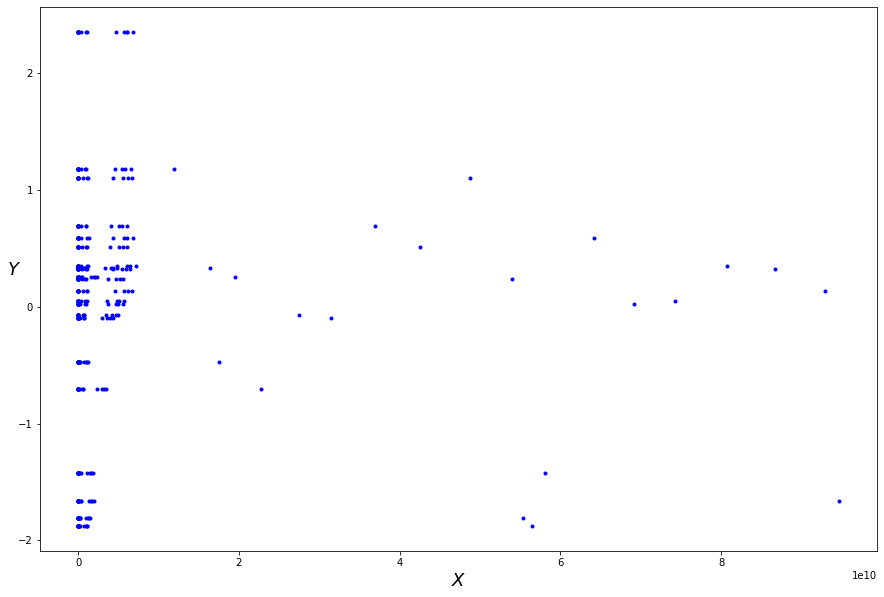

In [120]:
plt.figure(figsize=(15,10))
plt.plot(X,Y, "b.")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$Y$", rotation=0, fontsize=18)
plt.show()

<h1>Aplico Regresion Lineal</h1>

In [121]:
lin_reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)#, random_state=42
lin_reg.fit(X_train, y_train)
#lin_reg.intercept_, lin_reg.coef_

LinearRegression()

In [122]:
# Make predictions using the testing set
Y_pred = lin_reg.predict(X_test)

# The coefficients
print("Coefficients: \n", lin_reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, Y_pred))

Coefficients: 
 [-6.85305128e-01 -7.34793170e-01 -7.92386298e-04 -2.99068537e-04
  1.15520158e-02  3.69475393e-04  2.26279460e-01  1.67760807e+00
 -2.26279464e-01 -2.25485895e-01  7.92508494e-04 -1.19381732e-06
  1.95870182e-02 -1.20501380e-06 -1.28339561e-11]
Mean squared error: 165.23
Coefficient of determination: -98.71


<h1>Grafico los valores</h1>

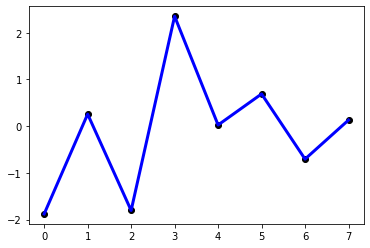

In [136]:
# Plot outputs
X_test_sample = pd.factorize(X_test['COSTO'])[0].reshape(-1, 1)
plt.scatter(X_test_sample, y_test, color="black")
plt.plot(X_test_sample, y_test, color="blue", linewidth=3)